In [1]:
import pandas                as pd
import matplotlib.pyplot as plt
import time
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv("C:\\Study\\DataMining\\ECLAT - Datasets\\Google Retail.csv")

In [3]:
rows, columns = df.shape
print(f'Dữ liệu có {rows} dòng và {columns} cột')

Dữ liệu có 181247 dòng và 4 cột


In [4]:
df

,InvoiceNo,InvoiceDate,StockCode,Quantity
0,536598,2017-01-01,21421,1
1,536598,2017-01-01,21422,2
2,536598,2017-01-01,22178,26
3,536599,2017-01-01,20749,2
4,536599,2017-01-01,21056,2
...,...,...,...,...
181242,580137,2017-12-31,21977,1
181243,580137,2017-12-31,20914,6
181244,580137,2017-12-31,21034,3
181245,580137,2017-12-31,21588,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181247 entries, 0 to 181246
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    181247 non-null  int64 
 1   InvoiceDate  181247 non-null  object
 2   StockCode    181247 non-null  int64 
 3   Quantity     181247 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.5+ MB


In [6]:
null_counts = df.isnull().sum()
null_counts

InvoiceNo      0
InvoiceDate    0
StockCode      0
Quantity       0
dtype: int64

**EDA**

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df.tail()

,InvoiceNo,InvoiceDate,StockCode,Quantity
181242,580137,2017-12-31,21977,1
181243,580137,2017-12-31,20914,6
181244,580137,2017-12-31,21034,3
181245,580137,2017-12-31,21588,1
181246,580137,2017-12-31,21034,2


In [8]:
stock_num = df['StockCode'].nunique()
print(f'Bộ dữ liệu này có {stock_num} stock')

Bộ dữ liệu này có 1178 stock


In [9]:
invoice_num = df['InvoiceNo'].nunique()
print(f'Bộ dữ liệu này có {invoice_num} hóa đơn')

Bộ dữ liệu này có 16522 hóa đơn


In [ ]:
top10_stock = df['StockCode'].value_counts().head(10)
top10_stock

StockCode
20725    1549
22197    1357
21212    1325
20727    1281
21931    1162
20728    1145
22086    1083
15056    1070
20724    1022
20726    1009
Name: count, dtype: int64

In [11]:
bottom10_stock = df['StockCode'].value_counts().tail(10)
bottom10_stock

StockCode
21268    1
22275    1
17028    1
22146    1
21310    1
21414    1
20820    1
17001    1
20678    1
17191    1
Name: count, dtype: int64

**TOP 10 Items**

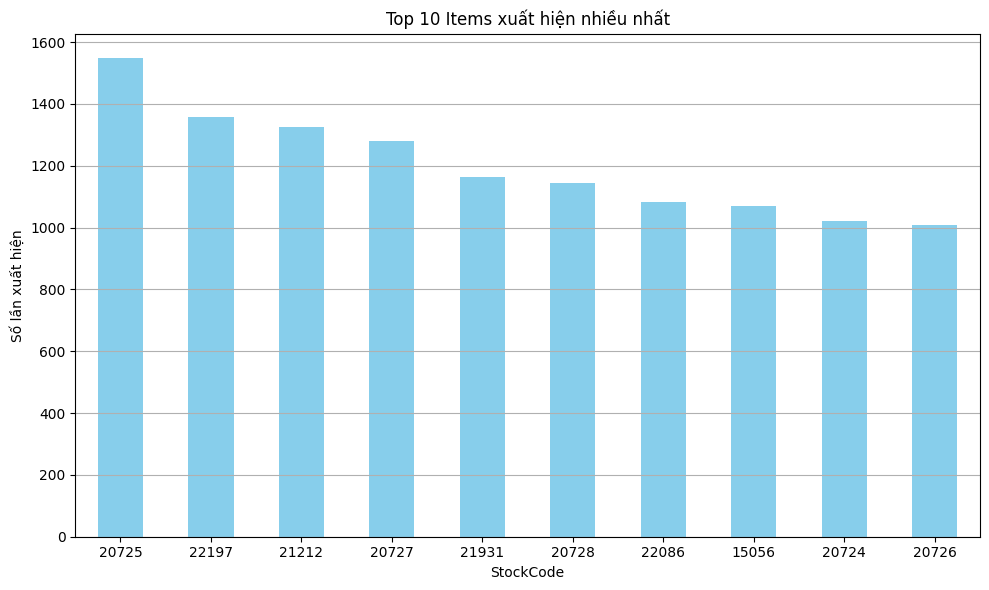

In [12]:
plt.figure(figsize=(10, 6))
top10_stock.plot(kind='bar', color='skyblue')
plt.title('Top 10 Items xuất hiện nhiều nhất')
plt.xlabel('StockCode')
plt.ylabel('Số lần xuất hiện')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

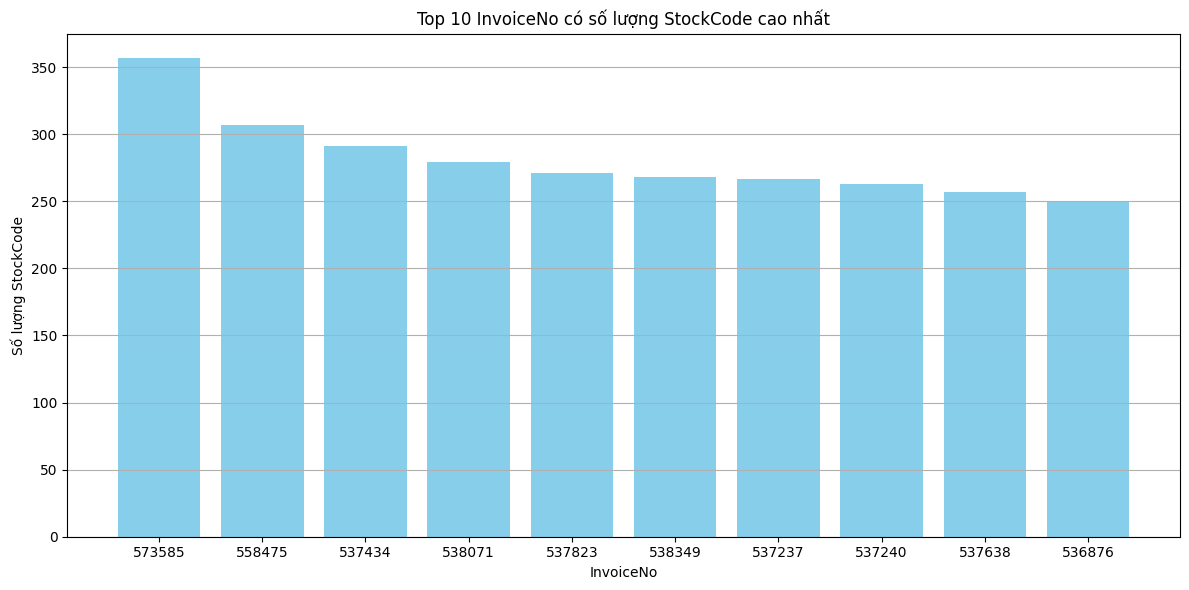

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Groupby theo 'InvoiceNo' và đếm số lượng 'StockCode'
stock_counts = df.groupby('InvoiceNo')['StockCode'].count().reset_index()
stock_counts.columns = ['InvoiceNo', 'StockCode_Count']

top10_stock_counts = stock_counts.nlargest(10, 'StockCode_Count')

plt.figure(figsize=(12, 6))
plt.bar(top10_stock_counts['InvoiceNo'].astype(str), top10_stock_counts['StockCode_Count'], color='skyblue')
plt.title('Top 10 InvoiceNo có số lượng StockCode cao nhất')
plt.xlabel('InvoiceNo')
plt.ylabel('Số lượng StockCode')
plt.xticks(rotation=0) 
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [14]:
quantity_sum = df.groupby("StockCode")["Quantity"].sum()
top_10_quantity = quantity_sum.sort_values(ascending=False).head(10)

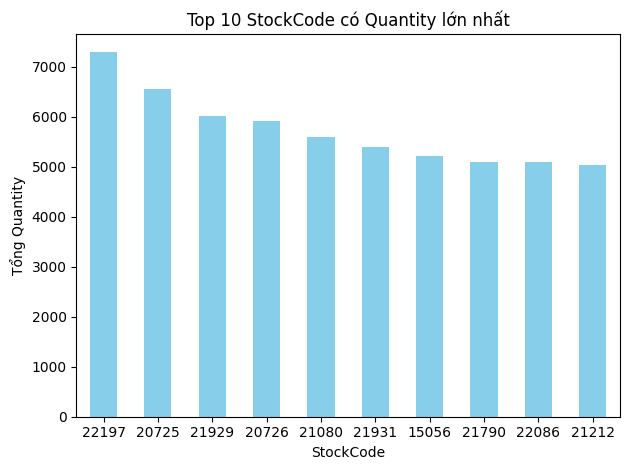

In [15]:
top_10_quantity.plot(kind="bar", color="skyblue")
plt.title("Top 10 StockCode có Quantity lớn nhất", fontsize=12)
plt.xlabel("StockCode", fontsize=10)
plt.ylabel("Tổng Quantity", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Số lượng hàng hóa được mua theo thời gian**

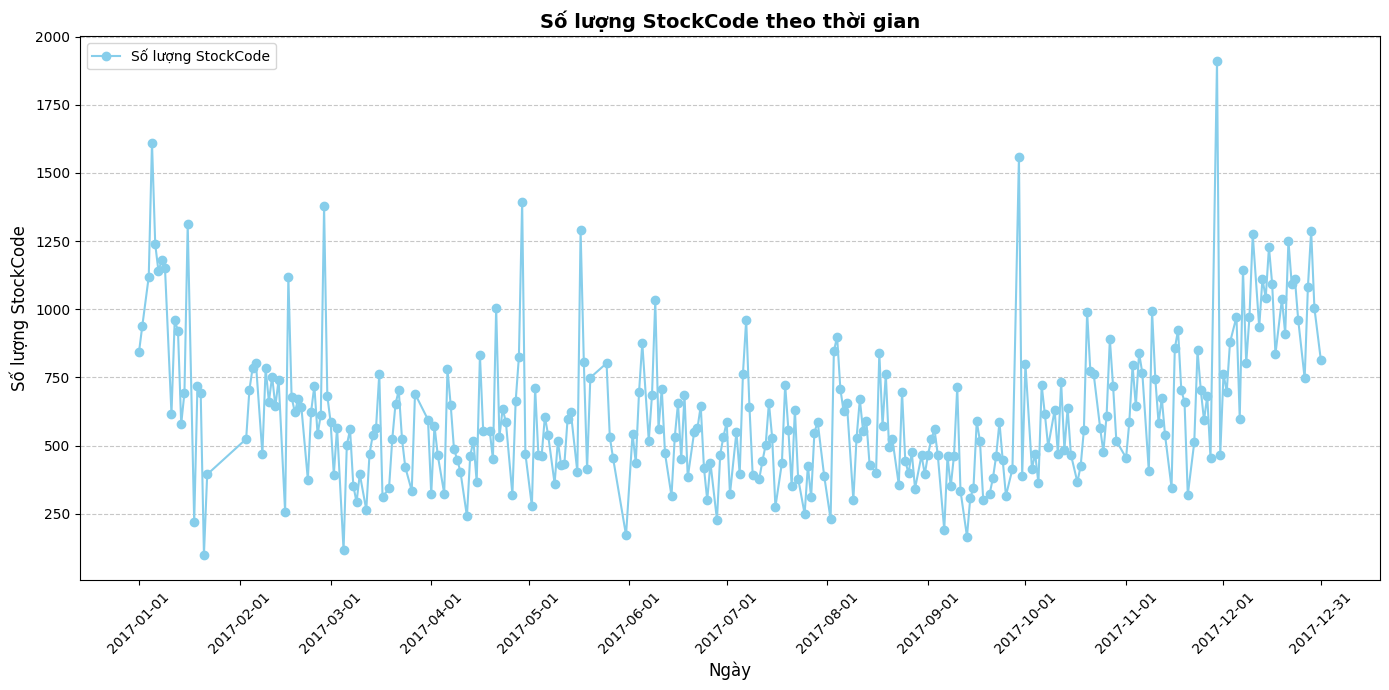

In [16]:
stock_counts = df.groupby('InvoiceDate')['StockCode'].count().reset_index()
stock_counts.columns = ['InvoiceDate', 'StockCode_Count']

start_date = '2017-01-01'
end_date = '2017-12-31' 
all_months = pd.date_range(start=start_date, end=end_date, freq='MS').tolist() 
all_months.append(pd.Timestamp(end_date))

plt.figure(figsize=(14, 7))
plt.plot(stock_counts['InvoiceDate'], stock_counts['StockCode_Count'], marker='o', color='skyblue', label='Số lượng StockCode')
plt.title('Số lượng StockCode theo thời gian', fontsize=14, fontweight='bold')
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Số lượng StockCode', fontsize=12)
plt.xticks(all_months, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()


**Số lượng đơn hàng được mua theo tháng**

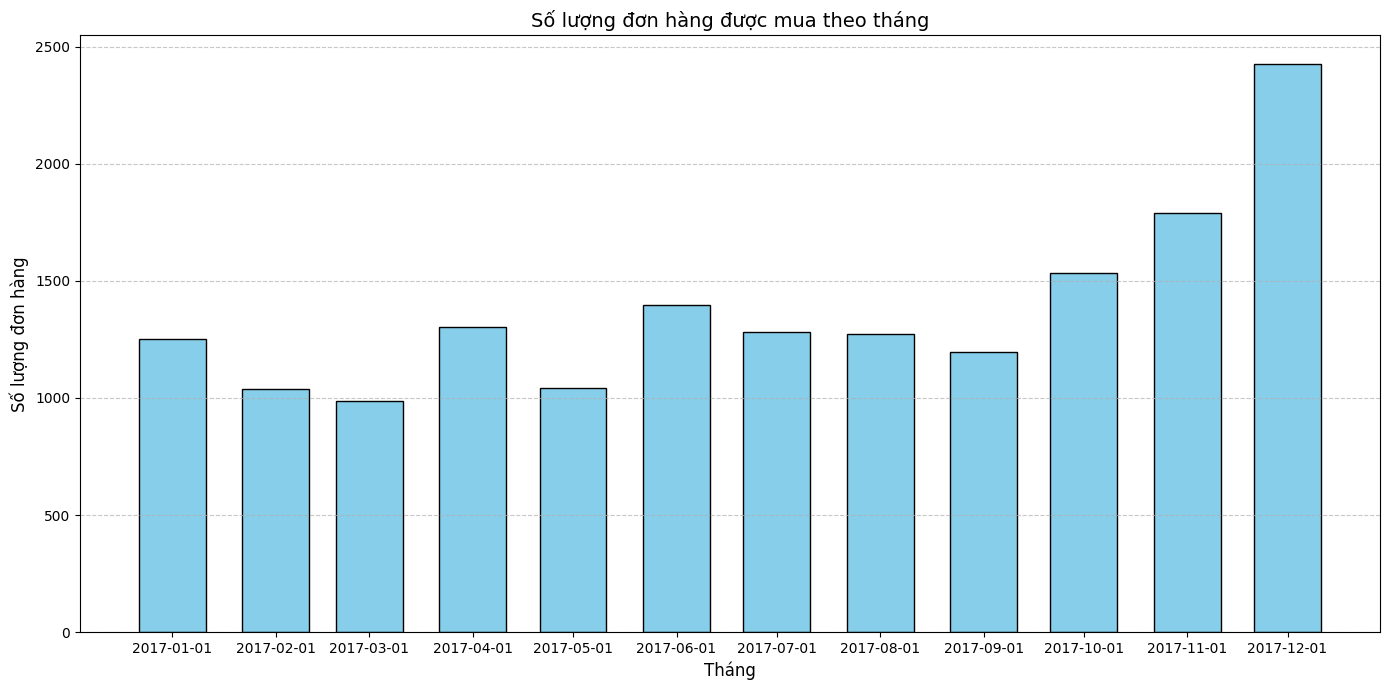

In [17]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_orders = df.groupby('Month')['InvoiceNo'].nunique().reset_index()
monthly_orders.columns = ['Month', 'Order_Count']

monthly_orders['Month'] = monthly_orders['Month'].dt.to_timestamp()

plt.figure(figsize=(14, 7))
plt.bar(monthly_orders['Month'], monthly_orders['Order_Count'], color='skyblue', edgecolor='black', width=20)
plt.title('Số lượng đơn hàng được mua theo tháng', fontsize=14)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Số lượng đơn hàng', fontsize=12)
plt.xticks(monthly_orders['Month'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**ECLAT**

In [18]:
transactions = df.groupby('InvoiceNo')['StockCode'].apply(list).reset_index()
transactions.set_index('InvoiceNo', inplace=True)

transactions = transactions['StockCode'].tolist()


# Chuyển dữ liệu sang dạng dọc (vertical data format)
vertical_data = {}
for tid, transaction in enumerate(transactions):
    for item in transaction:
        if item not in vertical_data:
            vertical_data[item] = set()
        vertical_data[item].add(tid)

In [22]:
start_time = time.time()

def eclat(prefix, items, min_freq, frequent_itemsets):
    count = 0
    while items:
        count += 1
        item, tids = items.pop()
        freq = len(tids)
        if freq >= min_freq:
            frequent_itemsets.append((prefix + [item], freq))
            suffix = []
            for other_item, other_tids in items:
                new_tids = tids & other_tids
                if len(new_tids) >= min_freq:
                    suffix.append((other_item, new_tids))
            eclat(prefix + [item], suffix, min_freq, frequent_itemsets)

num_transactions = len(set(df['InvoiceNo']))
min_support = 0.02
min_freq = num_transactions * min_support 
frequent_itemsets = []
items = list(vertical_data.items())
eclat([], items, min_freq, frequent_itemsets)

end_time = time.time()
eclat_execution_time = end_time - start_time
print("Time run ECLAT: ", eclat_execution_time)
print("Frequent Itemsets:")

frequent_itemsets_df = pd.DataFrame(frequent_itemsets, columns=["Itemset", "Frequency"])

frequent_itemsets_df

Time run ECLAT:  4.04737401008606
Frequent Itemsets:


,Itemset,Frequency
0,[21770],373
1,[22138],899
2,[21535],336
3,[21122],333
4,[22192],352
...,...,...
164,[22219],531
165,[22189],507
166,[21871],338
167,[20749],370


In [23]:
frequent_itemsets_df = pd.DataFrame([{'itemsets': set(itemset), 
                        'support': support / len(transactions)} for itemset, support in frequent_itemsets])

rules = association_rules(frequent_itemsets_df, metric="confidence", min_threshold=0.4)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

rules = rules.sort_values(by=['lift', 'confidence', 'support', 'antecedents', 'consequents'], ascending=[False, False, False, True, True]).reset_index()
rules = rules.drop(columns=["index"])

print("\nAssociation Rules:")
rules


Association Rules:


,antecedents,consequents,support,confidence,lift
0,(21086),(21094),0.021002,0.818396,25.953057
1,(21094),(21086),0.021002,0.666027,25.953057
2,(21094),(21080),0.022213,0.704415,12.047969
3,(20723),(20719),0.023786,0.560628,11.435420
4,(20719),(20723),0.023786,0.485185,11.435420
5,(20724),(20723),0.028507,0.469124,11.056860
6,(20723),(20724),0.028507,0.671897,11.056860
7,(20719),(20724),0.029657,0.604938,9.954970
8,(20724),(20719),0.029657,0.488048,9.954970
9,(21929),(21928),0.023605,0.463183,9.723898


**APRIORI**

In [24]:
df1 = df.groupby('InvoiceNo')['StockCode'].apply(list).reset_index()

In [25]:
df_exploded = df1.explode('StockCode')

wide_table = df_exploded.pivot_table(index='InvoiceNo', columns='StockCode', aggfunc=lambda x: 1, fill_value=0)

print(wide_table.head())

StockCode  10002  10080  10120  10123  10124  10125  10133  10135  11001  \
InvoiceNo                                                                  
536598         0      0      0      0      0      0      0      0      0   
536599         0      0      0      0      0      0      0      0      0   
536600         0      0      0      0      0      0      0      0      0   
536602         0      0      0      0      0      0      0      0      0   
536604         0      0      0      0      0      0      0      0      0   

StockCode  15030  ...  22305  22306  22307  22308  22309  22310  22311  22312  \
InvoiceNo         ...                                                           
536598         0  ...      0      0      0      0      0      0      0      0   
536599         0  ...      0      0      0      0      0      0      0      0   
536600         0  ...      0      0      0      0      0      0      0      0   
536602         0  ...      0      0      0      0      0      

In [26]:
#Chuyển thành dạng bảng nhị phân làm input cho Apriori và FP Growth
binary_table = wide_table.applymap(lambda x: 1 if x > 0 else 0)

In [27]:
start_time = time.time()

frequent_itemsets_apriori = apriori(binary_table, min_support=0.02, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.4)

end_time = time.time()
apriori_execution_time = end_time - start_time

print("Các tập phổ biến (Apriori)\n")
apriori_results = frequent_itemsets_apriori[['itemsets', 'support']].sort_values(by='support', ascending=False).reset_index()
apriori_results = apriori_results.drop(columns=["index"])


Các tập phổ biến (Apriori)



In [28]:
apriori_results

,itemsets,support
0,(20725),0.091938
1,(22197),0.080317
2,(21212),0.077412
3,(20727),0.074507
4,(21931),0.069544
...,...,...
164,(22161),0.020215
165,(21122),0.020155
166,(21217),0.020094
167,"(21212, 20725)",0.020094


In [39]:
print("Time run Apriori: ", apriori_execution_time)

Time run Apriori:  33.394044637680054


In [30]:
apriori_rules_results = rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
apriori_rules_results = apriori_rules_results.sort_values(by=['lift', 'confidence', 'support', 'antecedents', 'consequents'], ascending=[False, False, False, True, True]).reset_index()
print("Các luật kết hợp mạnh theo Confidence (Apriori):\n")
apriori_rules_results = apriori_rules_results.drop(columns=["index"])

apriori_rules_results

Các luật kết hợp mạnh theo Confidence (Apriori):



,antecedents,consequents,support,confidence,lift
0,(21086),(21094),0.021002,0.818396,25.953057
1,(21094),(21086),0.021002,0.666027,25.953057
2,(21094),(21080),0.022213,0.704415,12.047969
3,(20723),(20719),0.023786,0.560628,11.435420
4,(20719),(20723),0.023786,0.485185,11.435420
5,(20724),(20723),0.028507,0.469124,11.056860
6,(20723),(20724),0.028507,0.671897,11.056860
7,(20719),(20724),0.029657,0.604938,9.954970
8,(20724),(20719),0.029657,0.488048,9.954970
9,(21929),(21928),0.023605,0.463183,9.723898


In [31]:
start_time = time.time()
frequent_itemsets_fp = fpgrowth(binary_table, min_support=0.02, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.4)
end_time = time.time()
fp_execution_time = end_time - start_time

fp_results = frequent_itemsets_fp[['itemsets', 'support']].sort_values(by='support', ascending=False).reset_index()
fp_results = fp_results.drop(columns=["index"])

print("Các tập phổ biến (FP-Growth)\n")
fp_results

Các tập phổ biến (FP-Growth)



,itemsets,support
0,(20725),0.091938
1,(22197),0.080317
2,(21212),0.077412
3,(20727),0.074507
4,(21931),0.069544
...,...,...
164,(22161),0.020215
165,(21122),0.020155
166,(21217),0.020094
167,"(21212, 20725)",0.020094


In [41]:
print("Time run Eclat: ", fp_execution_time)


Time run Eclat:  2.2690134048461914


In [32]:
fp_rules_results = rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
fp_rules_results = fp_rules_results.sort_values(by=['lift', 'confidence', 'support', 'antecedents', 'consequents'], ascending=[False, False, False, True, True]).reset_index()
fp_rules_results = fp_rules_results.drop(columns=["index"])

fp_rules_results

,antecedents,consequents,support,confidence,lift
0,(21086),(21094),0.021002,0.818396,25.953057
1,(21094),(21086),0.021002,0.666027,25.953057
2,(21094),(21080),0.022213,0.704415,12.047969
3,(20723),(20719),0.023786,0.560628,11.435420
4,(20719),(20723),0.023786,0.485185,11.435420
5,(20724),(20723),0.028507,0.469124,11.056860
6,(20723),(20724),0.028507,0.671897,11.056860
7,(20719),(20724),0.029657,0.604938,9.954970
8,(20724),(20719),0.029657,0.488048,9.954970
9,(21929),(21928),0.023605,0.463183,9.723898


**Số lượng tập phổ biến**

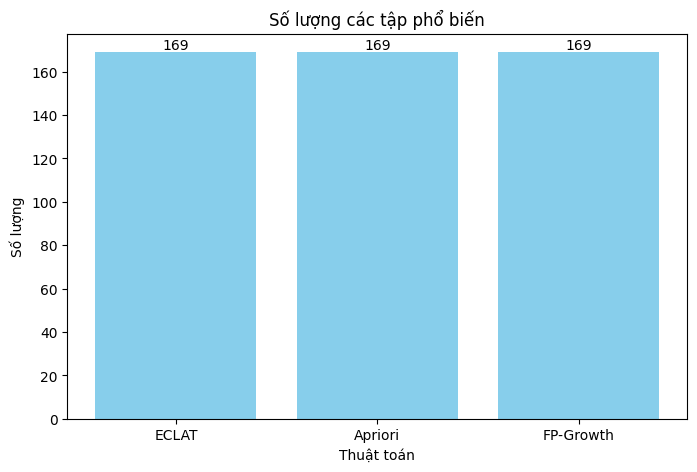

In [38]:
frequent_itemsets_count = frequent_itemsets_df.shape[0]
apriori_results_count = apriori_results.shape[0]
fp_results_count = fp_results.shape[0]
data = {
    'ECLAT': frequent_itemsets_count,
    'Apriori': apriori_results_count,
    'FP-Growth': fp_results_count
}

plt.figure(figsize=(8, 5))
bars = plt.bar(data.keys(), data.values(), color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height,  
        f'{int(height)}',  
        ha='center', 
        va='bottom',  
        fontsize=10  
    )
plt.title('Số lượng các tập phổ biến')
plt.xlabel('Thuật toán')
plt.ylabel('Số lượng')
plt.show()


**So sánh thời gian chạy các thuật toán**

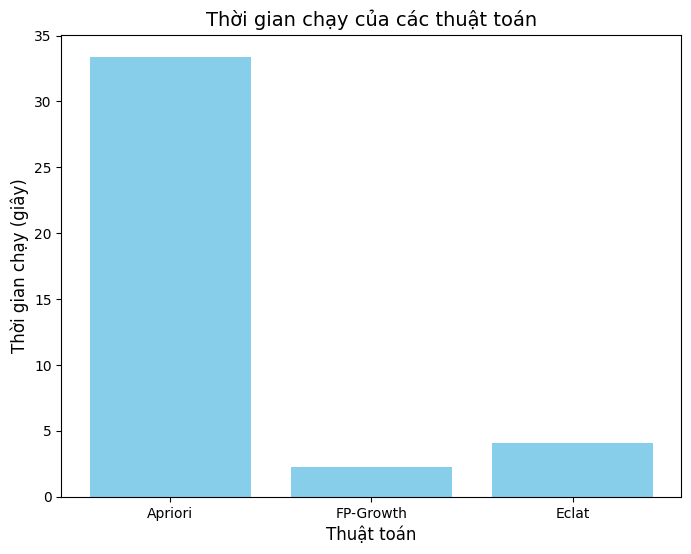

In [34]:
algorithms = ['Apriori', 'FP-Growth', 'Eclat']

execution_times = [apriori_execution_time, fp_execution_time, eclat_execution_time]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, execution_times, color='skyblue')

plt.title('Thời gian chạy của các thuật toán', fontsize=14)
plt.xlabel('Thuật toán', fontsize=12)
plt.ylabel('Thời gian chạy (giây)', fontsize=12)

plt.show()


**So sánh luật kết hợp mạnh của mỗi thuật toán**

In [35]:
if len(fp_rules_results) == len(apriori_rules_results) == len(rules):
    comparison_results = pd.DataFrame({
        'fp_equals_apriori': (fp_rules_results.values == apriori_rules_results.values).all(axis=1),
        'fp_equals_eclat': (fp_rules_results.values == rules.values).all(axis=1),
        'apriori_equals_eclat': (apriori_rules_results.values == rules.values).all(axis=1),
    })
else:
    print("Các DataFrame không có số dòng giống nhau.")

# Hiển thị kết quả
comparison_results

,fp_equals_apriori,fp_equals_eclat,apriori_equals_eclat
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,True,True,True
7,True,True,True
8,True,True,True
9,True,True,True
